<a href="https://colab.research.google.com/github/HarisAnsari75/HABERMAN_EDA/blob/main/Haberman_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('/content/haberman.csv')

In [ ]:
df.columns=['Age','Year','nodes','survival']
df.head()

,Age,Year,nodes,survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


**AGENDA: Given a patient with the some Age,Year of operation and no.of lymph nodes detected , we have predicts or conclude the chances wheather the will live less than 5 years or more than 5 years**

In [ ]:
df.isnull().sum()    #checking null value or sum value

,0
Age,0
Year,0
nodes,0
survival,0


In [ ]:
df.duplicated().value_counts()    #we will not remove the duplicate ,as these can be a genuine possibility

,count
False,288
True,17


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       305 non-null    int64
 1   Year      305 non-null    int64
 2   nodes     305 non-null    int64
 3   survival  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [ ]:
df.survival.value_counts()

,count
survival,
1,224
2,81


In [ ]:
df=df.replace([1,2],[0,1])    #changing the value to 1,2 into 0,1 in survival colm

In [ ]:
df.survival.value_counts()

,count
survival,
0,224
1,81


In [ ]:
df.describe()     #Min(Age)=30, Max(Age)=83 , Year=[1958,1969], Nodes=[0,52] , Survival=[0,1]
                  #Nodes has higher count density between 0 and 4 (75%)

,Age,Year,nodes,survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,3.839344,0.265574
std,10.744024,3.254078,7.283978,0.442364
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,0.000000,0.000000
75%,61.000000,66.000000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


**Univariate Analysis**

In [ ]:

#1) Survival

In [ ]:
df.survival.value_counts()

,count
survival,
0,224
1,81


In [ ]:
df.survival.value_counts(1) #There are only 27% people who will be living lesss than 5 years,which means the dataset is imbalanced

,proportion
survival,
0,0.734426
1,0.265574


<Axes: xlabel='survival', ylabel='count'>

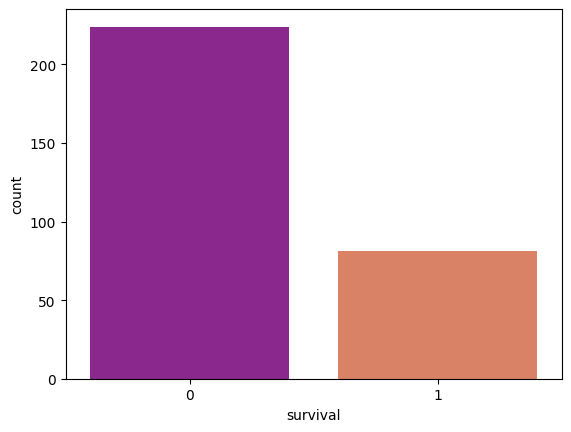

In [ ]:
sns.countplot(x='survival',data=df,palette='plasma')

In [ ]:
#2) Age

In [ ]:
df.Age.describe()

,Age
count,305.000000
mean,52.531148
std,10.744024
min,30.000000
25%,44.000000
50%,52.000000
75%,61.000000
max,83.000000


<Axes: xlabel='Age', ylabel='Count'>

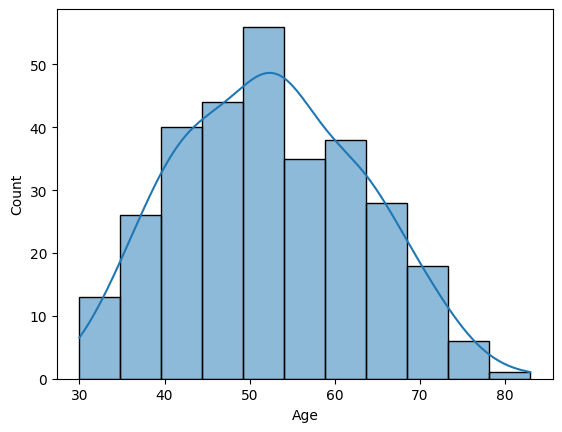

In [ ]:
sns.histplot(x='Age',data=df,binwidth=5, kde=True) #INSIGHTS :- There many people is operated there age is 50 to 55

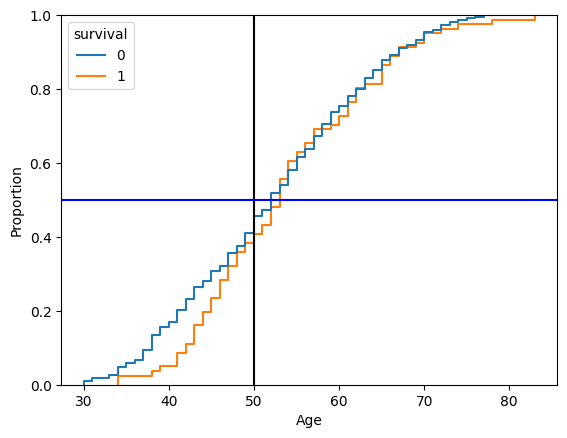

In [ ]:
sns.ecdfplot(x='Age',data=df, hue='survival')   #80% of the people is were 65 years or below
plt.axvline(50,c='black')                       #50% of the people is were 52 years or below
plt.axhline(0.5,c='blue')

In [ ]:
#3) Operation Year

<Axes: xlabel='Year'>

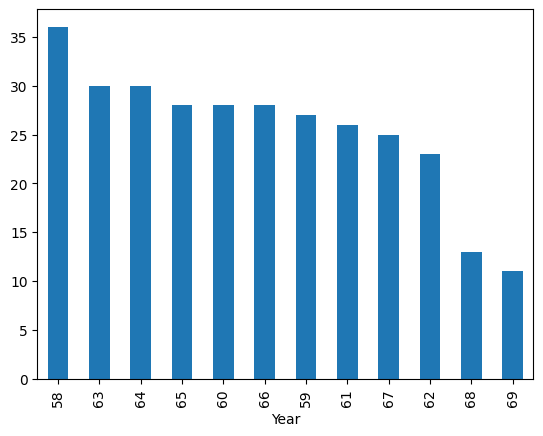

In [ ]:
df.Year.value_counts().plot(kind='bar')

In [ ]:
#4) Lymph nodes

<Axes: xlabel='nodes'>

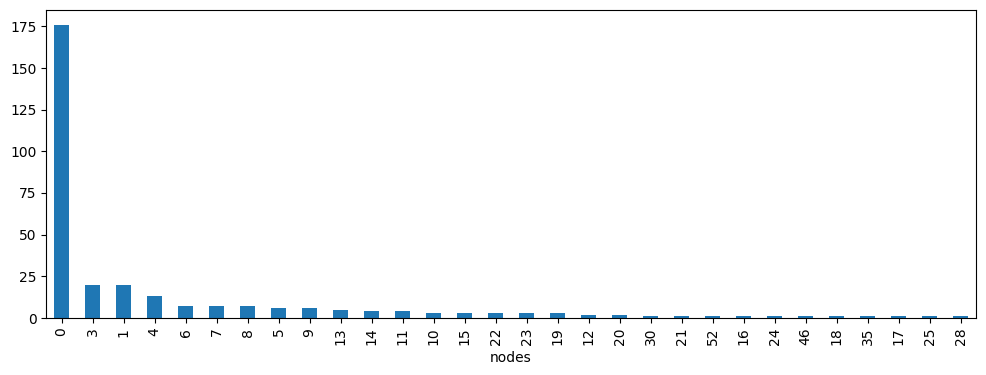

In [ ]:
plt.figure(figsize=(12,4))
df.nodes.value_counts().plot(kind='bar')   #INSIGHTS

2.940405369162834


<Axes: xlabel='nodes', ylabel='Count'>

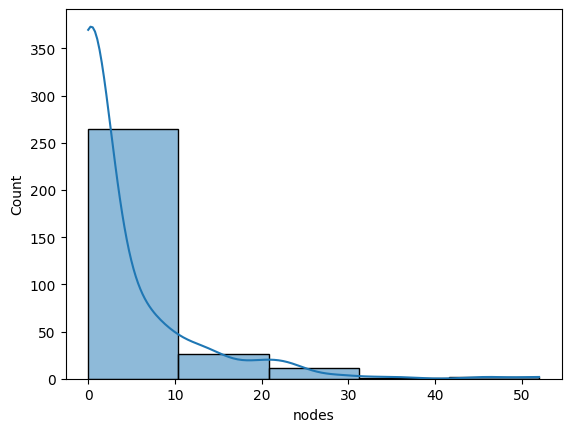

In [ ]:
print (df.nodes.skew())
sns.histplot(x='nodes',data=df,binwidth=10, kde=True)    #max density count for nodes are between 0 to 10

**BIVARIATE ANALYSIS**

In [ ]:
# Possible analysis for bivariate
#Age-Survival
#Age-Nodes-Survival
#Nodes-Survival
#Year-Survival
#Age-Nodes
#Year-Nodes
#Age-Nodes

<Axes: xlabel='survival', ylabel='Age'>

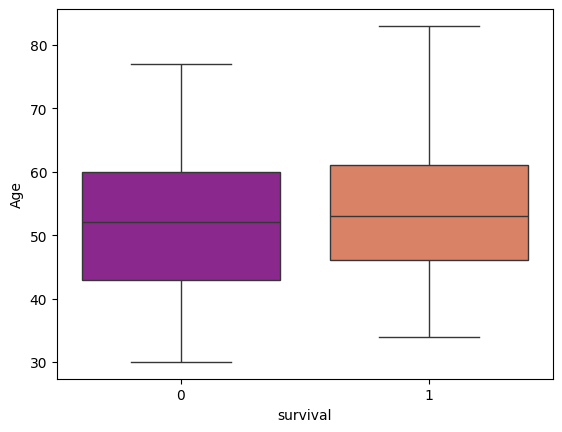

In [ ]:
sns.boxplot(x='survival',y='Age',data=df,palette='plasma')    #insights :- 1) People with age>77 will actually live lesser
                                                                           #than 5 years
                                                           # 2) people with age<35 will actually live more than 5 years

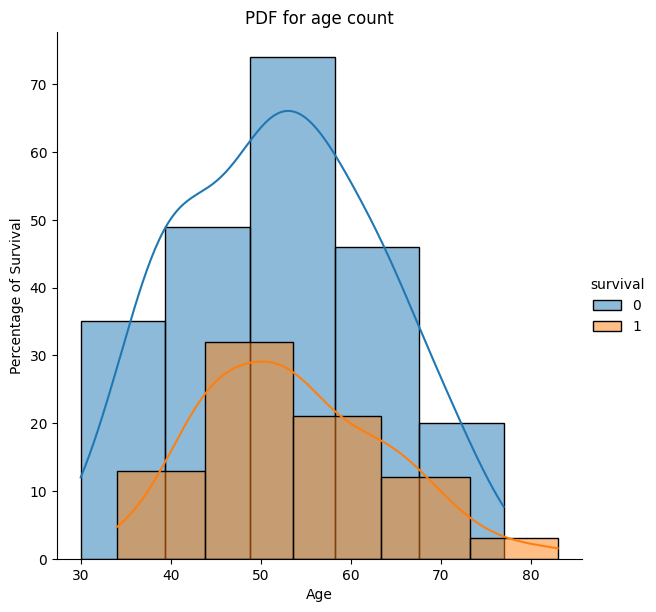

In [ ]:
sns.FacetGrid(df,hue='survival',height=6).map(sns.histplot,'Age',bins=5, kde=True).add_legend()
plt.xlabel('Age')                     #maximum % of people living lesser than 5 years are between 43 to 53.
plt.ylabel('Percentage of Survival')
plt.title('PDF for age count',size=12)
plt.show();

In [ ]:
df.groupby('Age')['survival'].sum().sort_values(ascending=False)  #these show how many people lived more than 5 years

,survival
Age,
53,6
43,4
54,4
52,4
46,4
65,4
47,3
41,3
44,3


In [ ]:
df.Age.value_counts().sort_values(ascending=False)  #these shows the total people in every age group

,count
Age,
52,14
54,13
50,12
43,11
57,11
53,11
47,11
41,10
38,10


<Figure size 1200x800 with 0 Axes>

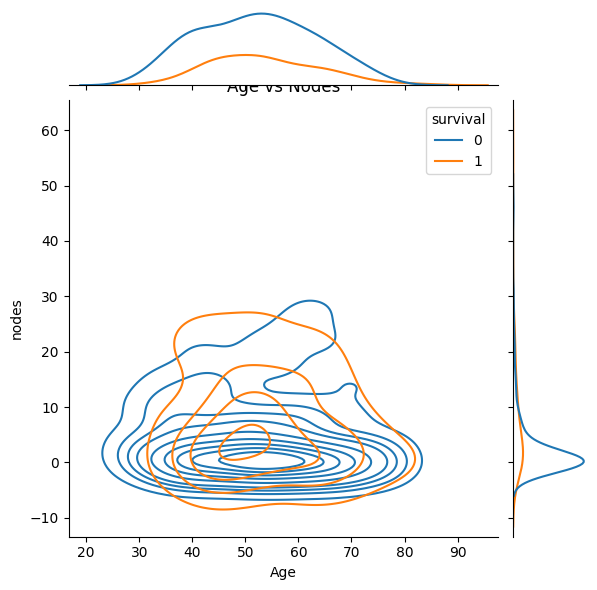

In [ ]:
plt.figure(figsize=(12,8))
sns.jointplot(x='Age',y='nodes',data=df,hue='survival',kind='kde')
plt.title('Age vs Nodes',size=12)
plt.show();

<Axes: xlabel='survival', ylabel='nodes'>

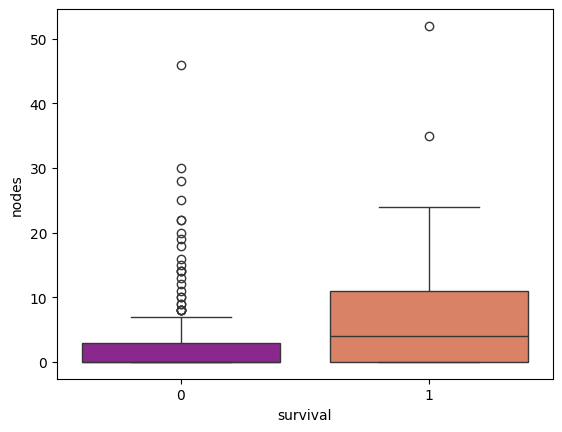

In [ ]:
sns.boxplot(x='survival',y='nodes',data=df,palette='plasma')

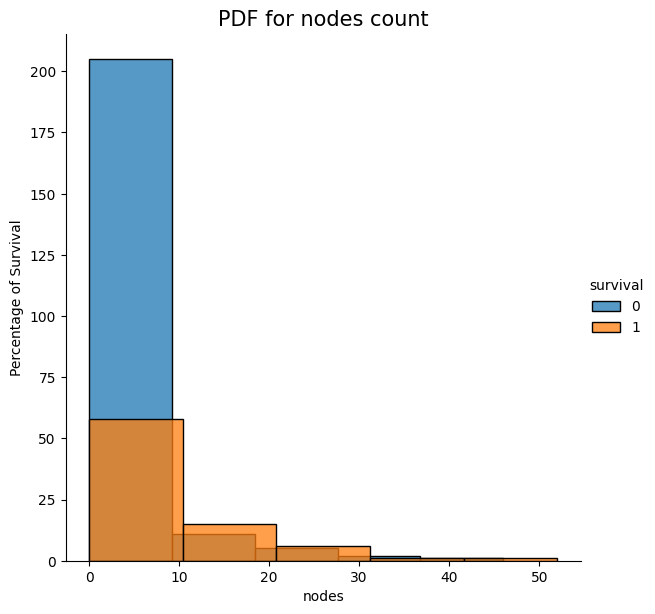

In [ ]:
sns.FacetGrid(df,hue='survival',height=6).map(sns.histplot,'nodes',bins=5,).add_legend()
plt.xlabel('nodes')
plt.ylabel('Percentage of Survival')
plt.title('PDF for nodes count',size=15)
plt.show();

In [ ]:
df.groupby('nodes')['survival'].sum().sort_values(ascending=False)  #these is the survival people as per there nodes
                                                                    #27 people died who have 0 nodes

,survival
nodes,
0,27
3,7
1,5
5,4
13,4
9,4
6,3
4,3
11,3


In [ ]:
df.nodes.value_counts()  #176 people have 0 nodes
                         #e.g ; out of 176 people 27 people died who have 0 nodes
                         #3/13 is equal to 23%%
                         #5/20 is equal to 25%

,count
nodes,
0,176
3,20
1,20
4,13
6,7
7,7
8,7
5,6
9,6


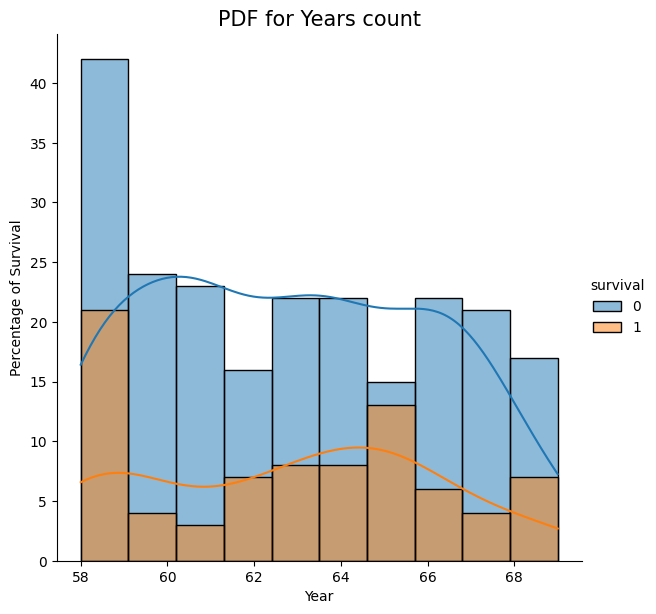

In [ ]:
sns.FacetGrid(data=df,hue='survival',height=6).map(sns.histplot,'Year',bins=10,kde=True).add_legend()
plt.xlabel('Year')
plt.ylabel('Percentage of Survival')
plt.title('PDF for Years count',size=15)
plt.show();

In [ ]:
df.groupby ('survival')['Year'].value_counts().unstack()   #e.g :1) 1958 year 12/36=0.33 which means 33%     , 2) 1959 =45%

Year,58,59,60,61,62,63,64,65,66,67,68,69
survival,,,,,,,,,,,,
0,24,18,24,23,16,22,22,15,22,21,10,7
1,12,9,4,3,7,8,8,13,6,4,3,4


<Figure size 1200x800 with 0 Axes>

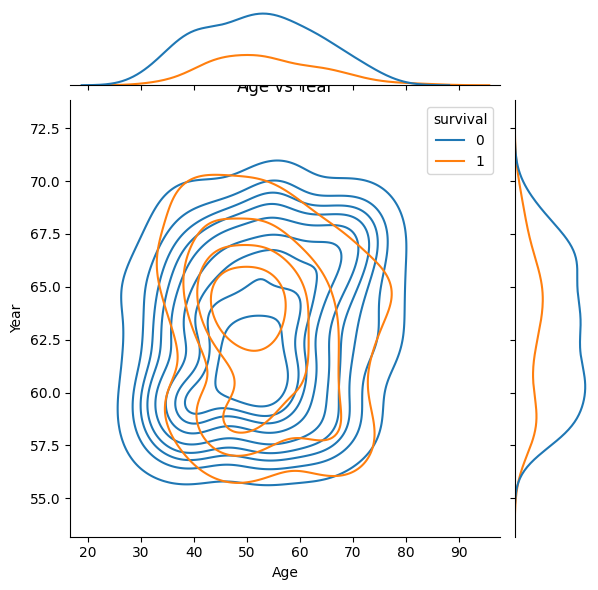

In [ ]:
plt.figure(figsize=(12,8))
sns.jointplot(x='Age',y='Year',data=df,hue='survival',kind='kde')
plt.title('Age vs Year',size=12)
plt.show();

**3) Multivariate Analysis**

<Axes: >

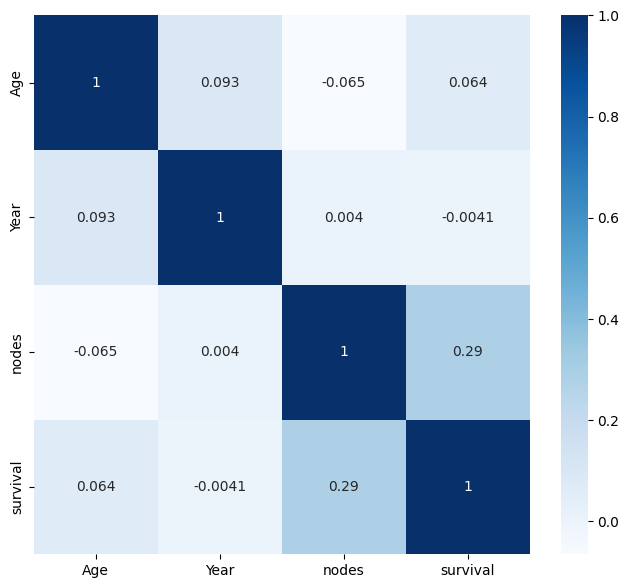

In [ ]:
plt.figure(figsize=(8,7)) #Nodes and survival are corelated by 29%
corr=df.corr()   #corr is use to create pivot table
sns.heatmap(corr,xticklabels=corr.columns,annot=True,cmap='Blues')